In [1]:
%matplotlib inline
%autosave 300
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
import wave
import pyaudio
from audio2numpy import open_audio
from IPython.display import Audio
from scipy import signal
from scipy.io.wavfile import write
from scipy.signal import  firwin, freqz, firwin2, butter

Autosaving every 300 seconds


In [2]:
inx = np.array([1, -1, 2 , -2, 3])
# Buffer should be initialized without any value

# Length of buffer = 5, output is indexed from end of buffer
# Therefore, a delay of 5 samples is created
buffer = np.zeros(5)
N = len(inx)
out = np.zeros(N)
inx

array([ 1, -1,  2, -2,  3])

In [3]:
buffer = [1,2,3,4,5]
buffer[:-1]

[1, 2, 3, 4]

In [4]:
nuffer=np.zeros(5)
nuffer[:-1]

array([0., 0., 0., 0.])

In [12]:
inx = np.array([1, -1, 2 , -2, [0]*6])
buffer = [1,2,3,4,5]
np.hstack([inx[1], buffer[1:]])

<ipython-input-12-27069d64c7df>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  inx = np.array([1, -1, 2 , -2, [0]*6])


array([-1,  2,  3,  4,  5])

In [11]:
np.array([0]*6)

array([0, 0, 0, 0, 0, 0])

In [31]:
inx = np.array([1, -1, 2 , -2, 0,0,0,0,0,0])
# Buffer should be initialized without any value

# Length of buffer = 5, output is indexed from end of buffer
# Therefore, a delay of 5 samples is created
buffer = np.zeros(5)
N = len(inx)
out = np.zeros(N)

for n in range(N):
    # Read the output at the current time sample
    # from the end of the delay buffer
    out[n] = buffer[-1]
    print(f'out {out}')
    
    buffer = np.hstack([inx[n], buffer[:-1]])
    print(f'buffer {buffer}')

print(f'inx {inx}')
print(f'out {out}')

out [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
buffer [1. 0. 0. 0. 0.]
out [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
buffer [-1.  1.  0.  0.  0.]
out [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
buffer [ 2. -1.  1.  0.  0.]
out [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
buffer [-2.  2. -1.  1.  0.]
out [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
buffer [ 0. -2.  2. -1.  1.]
out [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
buffer [ 0.  0. -2.  2. -1.]
out [ 0.  0.  0.  0.  0.  1. -1.  0.  0.  0.]
buffer [ 0.  0.  0. -2.  2.]
out [ 0.  0.  0.  0.  0.  1. -1.  2.  0.  0.]
buffer [ 0.  0.  0.  0. -2.]
out [ 0.  0.  0.  0.  0.  1. -1.  2. -2.  0.]
buffer [0. 0. 0. 0. 0.]
out [ 0.  0.  0.  0.  0.  1. -1.  2. -2.  0.]
buffer [0. 0. 0. 0. 0.]
inx [ 1 -1  2 -2  0  0  0  0  0  0]
out [ 0.  0.  0.  0.  0.  1. -1.  2. -2.  0.]


In [32]:
inx = np.array([1, -1, 2 , -2, 0,0,0,0,0,0])
buffer = np.zeros(20) # Longer buffer than delay length
# Number of samples of delay
delay = 5 # Does not need to be the same length as buffer
N = len(inx)
out = np.zeros(N)

# Series delay
for n in range(N):
    out[n] = buffer[delay]
    buffer = np.hstack([inx[n], buffer[:-1]])

# Compare the input & output signals
print('Series Delay: 5 Samples')
print('out(n) = in(n–5)')
print(f'The orig. input signal was: {inx}')
print(f'The final output signal is: {out}')


Series Delay: 5 Samples
out(n) = in(n–5)
The orig. input signal was: [ 1 -1  2 -2  0  0  0  0  0  0]
The final output signal is: [ 0.  0.  0.  0.  0.  0.  1. -1.  2. -2.]


In [33]:
# Feedforward (FIR) system
buffer = np.zeros(20)
delay = 2 # Number of samples of delay
inx = np.array([1,2,3,4,5,1,2,3,2,1])
# Parallel delay line
for n in range(N):
    out[n] = inx[n] + buffer[delay]
    buffer = np.hstack([inx[n], buffer[:-1]])

print('Feed–forward Delay: 3 samples');
print('out(n) = in(n) + in(n–3)');
print(f'The orig. input signal was: {inx}')
print(f'The final output signal is: {out}')

Feed–forward Delay: 3 samples
out(n) = in(n) + in(n–3)
The orig. input signal was: [1 2 3 4 5 1 2 3 2 1]
The final output signal is: [1. 2. 3. 5. 7. 4. 6. 8. 3. 3.]


In [35]:
# Feedback (IIR) system
buffer = np.zeros(20)
for n in range(N):
    out[n] = inx[n] + buffer[delay]
    buffer = np.hstack([out[n], buffer[:-1]])

print('Feed–back Delay: 3 samples')
print('out(n) = in(n) + out(n–3)');
print(f'The orig. input signal was: {inx}')
print(f'The final output signal is: {out}')

Feed–back Delay: 3 samples
out(n) = in(n) + out(n–3)
The orig. input signal was: [1 2 3 4 5 1 2 3 2 1]
The final output signal is: [ 1.  2.  3.  5.  7.  4.  7. 10.  6.  8.]


### feedback delay

In [48]:
def feedbackDelay(x, buffer, delay, fbGain):
    out = x + fbGain * buffer[delay]
    buffer = np.hstack([out, buffer[:-1]])
    
    return [out,buffer]

In [56]:
inx = np.array([1, -1, 2, -2, 0, 0, 0, 0, 0, 0])
buffer = np.zeros(20)
delay = 4
fbGain = 0.5
N = len(inx)
out = np.zeros(N)

for n in range(N):
    [out[n], buffer] = feedbackDelay(inx[n], buffer, delay, fbGain)
    
print(f'The orig. input signal was: {inx}')
print(f'The final output signal is: {out}')

The orig. input signal was: [ 1 -1  2 -2  0  0  0  0  0  0]
The final output signal is: [ 1.  -1.   2.  -2.   0.   0.5 -0.5  1.  -1.   0. ]


### modulo

In [57]:
m = 4;
for a in range(15):
    
    print(f'When "a" is : {a}')
    print(f'mod(a,4) is : {np.mod(a,m)}')

When "a" is : 0
mod(a,4) is : 0
When "a" is : 1
mod(a,4) is : 1
When "a" is : 2
mod(a,4) is : 2
When "a" is : 3
mod(a,4) is : 3
When "a" is : 4
mod(a,4) is : 0
When "a" is : 5
mod(a,4) is : 1
When "a" is : 6
mod(a,4) is : 2
When "a" is : 7
mod(a,4) is : 3
When "a" is : 8
mod(a,4) is : 0
When "a" is : 9
mod(a,4) is : 1
When "a" is : 10
mod(a,4) is : 2
When "a" is : 11
mod(a,4) is : 3
When "a" is : 12
mod(a,4) is : 0
When "a" is : 13
mod(a,4) is : 1
When "a" is : 14
mod(a,4) is : 2


### circular buffer

In [90]:
def circularBuffer(x,buffer,delay,n):
    # Determine indexes for circular buffer
    length = len(buffer)
    indexC = np.mod(n,length)  # Current index in circular buffer
    indexD = np.mod(n-delay,length)  # Delay index in circular buffer
    out = buffer[indexD]
    # Store the current output in appropriate index
    buffer[indexC] = x
    
    return out,buffer


In [91]:
b = np.array([0,1,2,3,4,5,6,7,8,9])
delay = 5
x=99
n=3

circularBuffer(x,b,delay,n)

(8, array([ 0,  1,  2, 99,  4,  5,  6,  7,  8,  9]))

In [92]:
inx = np.array([1, -1, 2, -2, 3, 0, 0, 0, 0, 0])
buffer = np.zeros(6)

# Number of samples of delay
delay = 4;
N = len(inx)
out = np.zeros(N)

# Series delay
for n in range(N):
    out[n],buffer = circularBuffer(inx[n],buffer,delay,n)
    # Display current status values
    print(f'The current sample number is: {n} ')
    print(f'The current buffer index is: {np.mod(n,6)}')
    print(f'The current delay index is: {np.mod(n-delay,6)}')
    print(f'The input is: {inx[n]} ')
    print(f'The delay buffer is: {buffer}')
    print(f'The output is: {out[n]}')
    print('')
          



The current sample number is: 0 
The current buffer index is: 0
The current delay index is: 2
The input is: 1 
The delay buffer is: [1. 0. 0. 0. 0. 0.]
The output is: 0.0

The current sample number is: 1 
The current buffer index is: 1
The current delay index is: 3
The input is: -1 
The delay buffer is: [ 1. -1.  0.  0.  0.  0.]
The output is: 0.0

The current sample number is: 2 
The current buffer index is: 2
The current delay index is: 4
The input is: 2 
The delay buffer is: [ 1. -1.  2.  0.  0.  0.]
The output is: 0.0

The current sample number is: 3 
The current buffer index is: 3
The current delay index is: 5
The input is: -2 
The delay buffer is: [ 1. -1.  2. -2.  0.  0.]
The output is: 0.0

The current sample number is: 4 
The current buffer index is: 4
The current delay index is: 0
The input is: 3 
The delay buffer is: [ 1. -1.  2. -2.  3.  0.]
The output is: 1.0

The current sample number is: 5 
The current buffer index is: 5
The current delay index is: 1
The input is: 0 
The

### linear interpolation delay

In [97]:
inx = np.array([1 , 0,0,0,0,0,0,0,0,0]) 

fracDelay = 3.2 # Fractional delay length in samples
intDelay = int(np.floor(fracDelay)) # Round down to get the previous (3)
frac = fracDelay - intDelay # Find the fractional amount (0.2)
buffer = np.zeros(5) # length(buffer) ≥ ceil(fracDelay)
N = len(inx)
out = np.zeros(N)
# Series Fractional Delay
for n in range(N):
    out[n] = (1-frac) * buffer[intDelay] + (frac) * buffer[intDelay+1]
    buffer = np.hstack([inx[n], buffer[:-1]])
    
# Compare the input & output signals
print(f'The orig. input signal was: {inx}')
print(f'The final output signal is: {out}')


The orig. input signal was: [1 0 0 0 0 0 0 0 0 0]
The final output signal is: [0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0. ]


### cubic interpolation

The orig. input signal was: [1 0 0 0 0 0 0 0 0 0]
The final output signal is: [ 0.     0.    -0.128  0.928  0.232 -0.032  0.     0.     0.     0.   ]


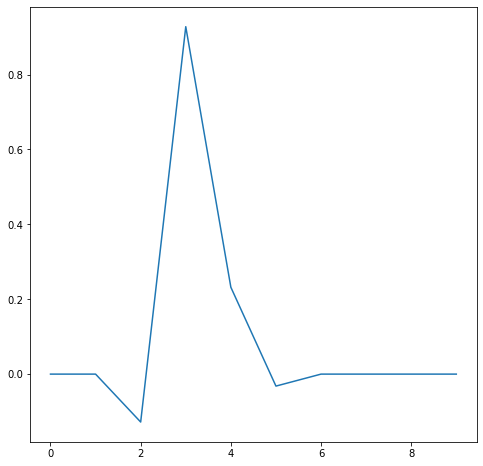

In [105]:
inx = np.array([1 , 0,0,0,0,0,0,0,0,0]) # Horizontal for displaying in Command Window
fracDelay = 3.2 # Fractional delay length in samples
intDelay = int(np.floor(fracDelay)) # Round down to get the previous (3)
frac = fracDelay - intDelay # Find the fractional amount (0.2)
buffer = np.zeros(5) # length(buffer) ≥ ceil(fracDelay)+1
N = len(inx)
out = np.zeros(N)

# Series fractional delay
for n in range(N):
    # Calculate intermediate variable for cubic interpolation
    a0 = buffer[intDelay+1] - buffer[intDelay] - buffer[intDelay-2] + buffer[intDelay-1]
    a1 = buffer[intDelay-2] - buffer[intDelay-1] - a0
    a2 = buffer[intDelay] - buffer[intDelay-2]
    a3 = buffer[intDelay-1]

    out[n] = a0*(frac**3) + a1*(frac**2) + a2*frac + a3
    buffer = np.hstack([inx[n], buffer[:-1]])

# Compare the input & output signals
print(f'The orig. input signal was: {inx}')
print(f'The final output signal is: {out}')

plt.plot(out);

